In [1]:
%matplotlib notebook 
import meshing
import matplotlib.pyplot as plt
import scipy.signal
import skimage.measure
import skimage.io
import skimage

<IPython.core.display.Javascript object>


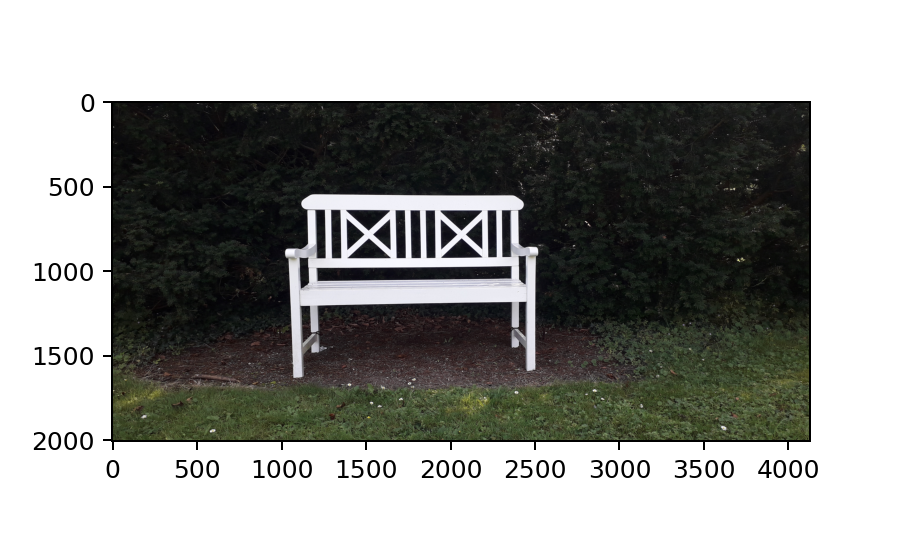

In [2]:
#%% PREPARATION: LOADING AND INSPECTING THE IMAGE
image = skimage.io.imread('data/bench.jpg')
figsize = (5,3)  # size for figures generated in this notebook
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(image)
plt.show()

<IPython.core.display.Javascript object>


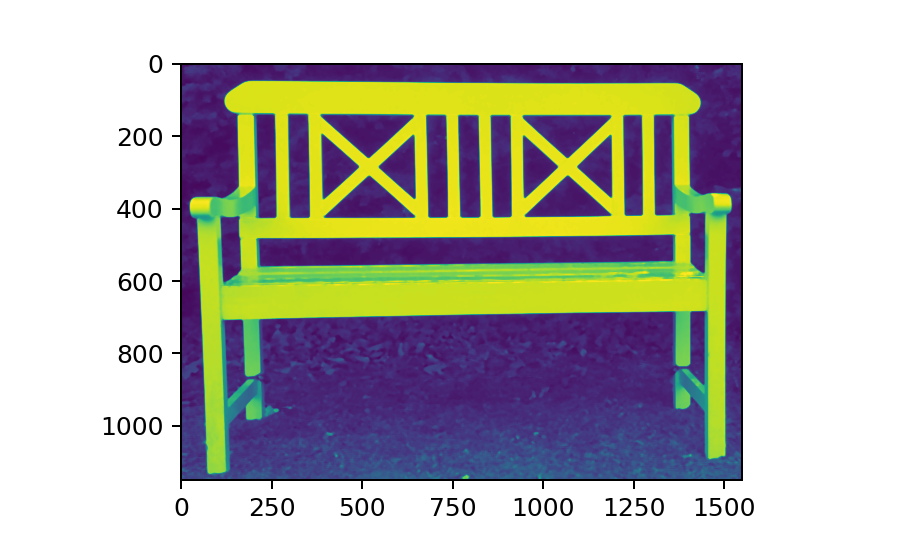

In [3]:
#%% CROP, CONVERT TO GRAYSCALE AND SMOOTH A BIT
image = image[500:1649, 1000:2549]
image = skimage.color.rgb2gray(image)
image = scipy.signal.medfilt(image,kernel_size=9)
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(image)
plt.show()

<IPython.core.display.Javascript object>


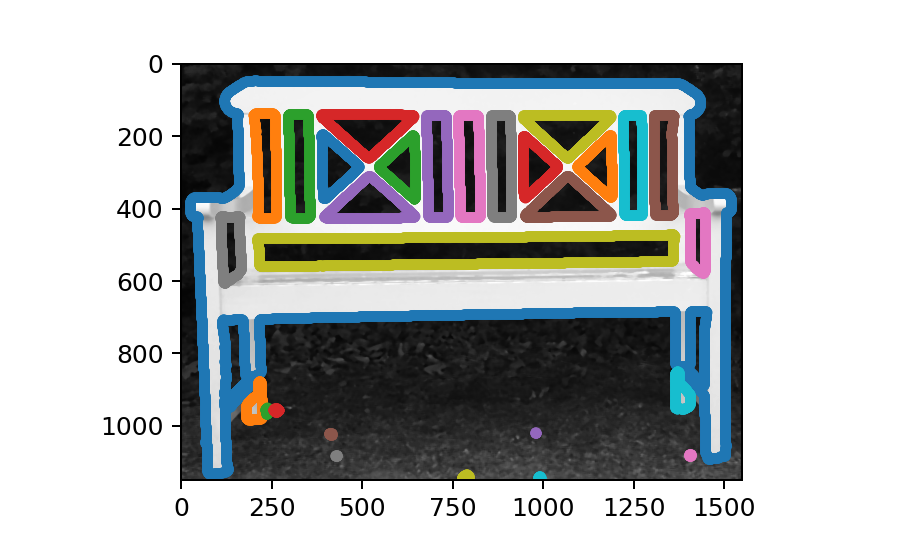

In [4]:
#%% DETECT CONTOURS
threshold = 0.5 # desured threshold for contour detection
contours = skimage.measure.find_contours(image, threshold)

fig, ax = plt.subplots(figsize=figsize)
ax.imshow(image,cmap=plt.cm.gray)
for c in contours:
    ax.plot(c[:,1], c[:,0],'.')
plt.show()

<IPython.core.display.Javascript object>


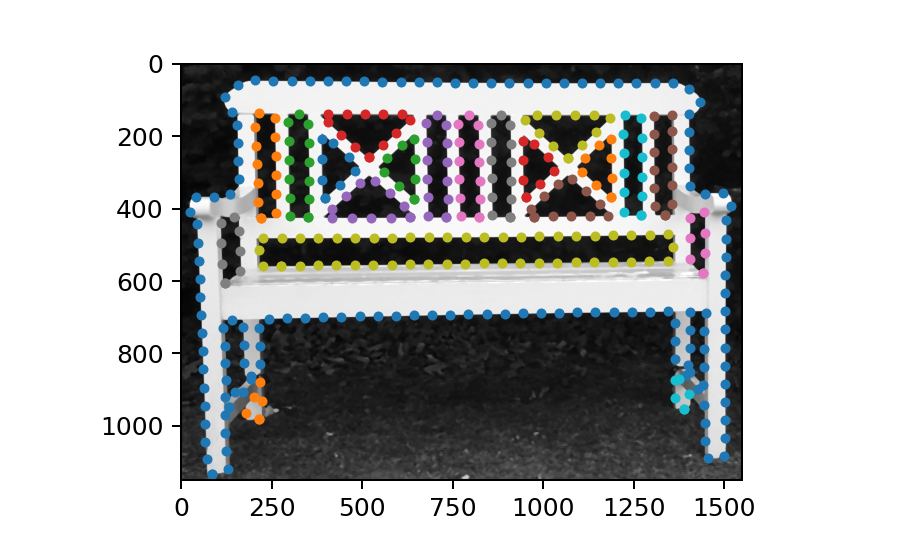

In [5]:
#%% RESAMPLE CONTOURS
average_edge_length = 50 # desired average edge length on the curves
contours = meshing.resample_contours(contours,average_edge_length)

fig, ax = plt.subplots(figsize=figsize)
ax.imshow(image,cmap=plt.cm.gray)
for c in contours:
    ax.plot(c[:,1], c[:,0],'.')
plt.show()

<IPython.core.display.Javascript object>


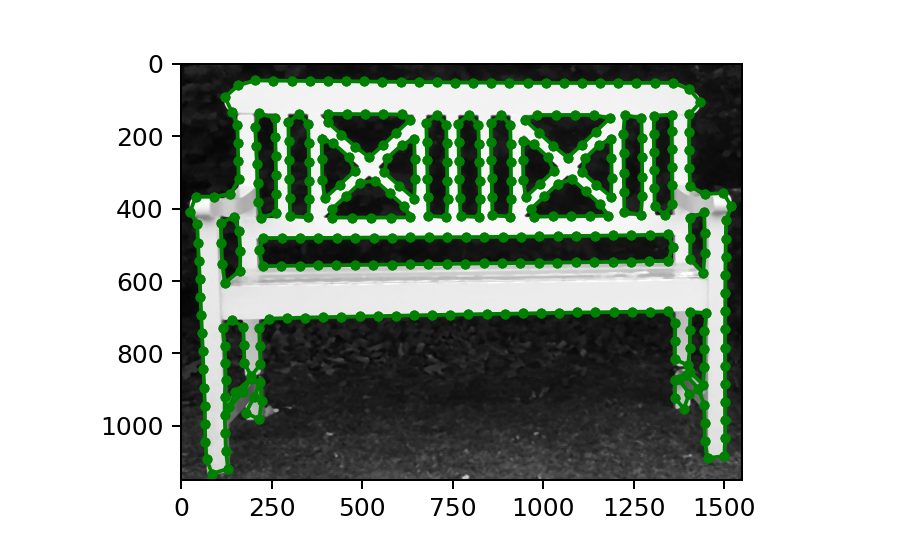

In [6]:
#%% COLLECT VERTICES AND EDGES OF CURVE SEGMENTS
vertices, edges = meshing.contours_to_segments(contours)

fig, ax = plt.subplots(figsize=figsize)
ax.imshow(image,cmap=plt.cm.gray)
for e in edges:
    ax.plot(vertices[e,1], vertices[e,0], '.g')
    ax.plot(vertices[e,1], vertices[e,0], '-g')
plt.show()

<IPython.core.display.Javascript object>


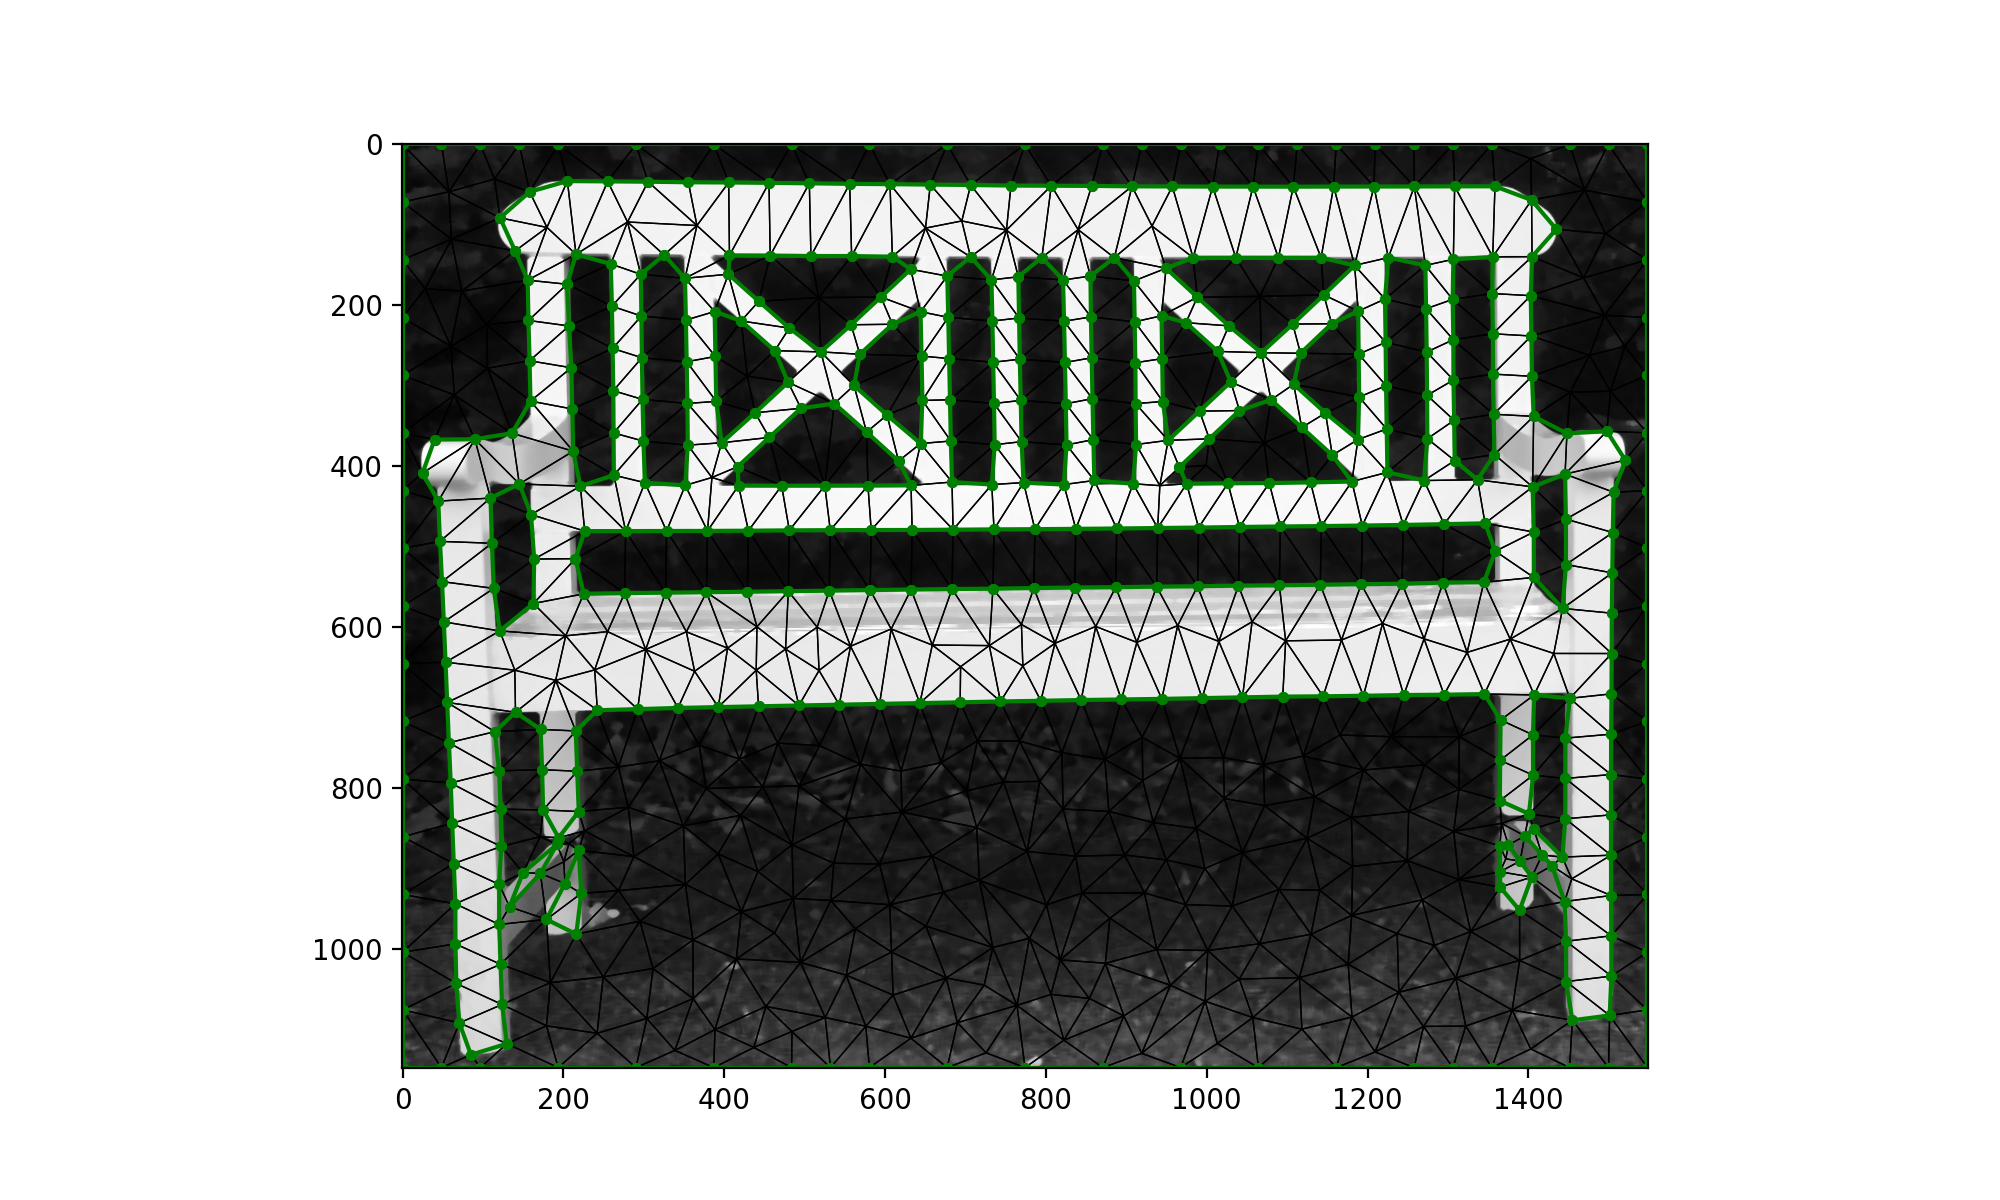

In [7]:
#%% TRIANGULATE IMAGE DOMAIN
max_area = (average_edge_length**2) # desired maximal triangle area
vertices, triangles, edges = meshing.triangulate_domain(vertices, edges, max_area, image.shape)

fig, ax = plt.subplots(figsize=figsize)
ax.imshow(image,cmap=plt.cm.gray)
for t in triangles:
    tri = t[[0,1,2,0]]
    ax.plot(vertices[tri,1], vertices[tri,0], 'k', linewidth=0.5)
for e in edges:
    ax.plot(vertices[e,1], vertices[e,0], '.g')
    ax.plot(vertices[e,1], vertices[e,0], '-g')
plt.show()

<IPython.core.display.Javascript object>


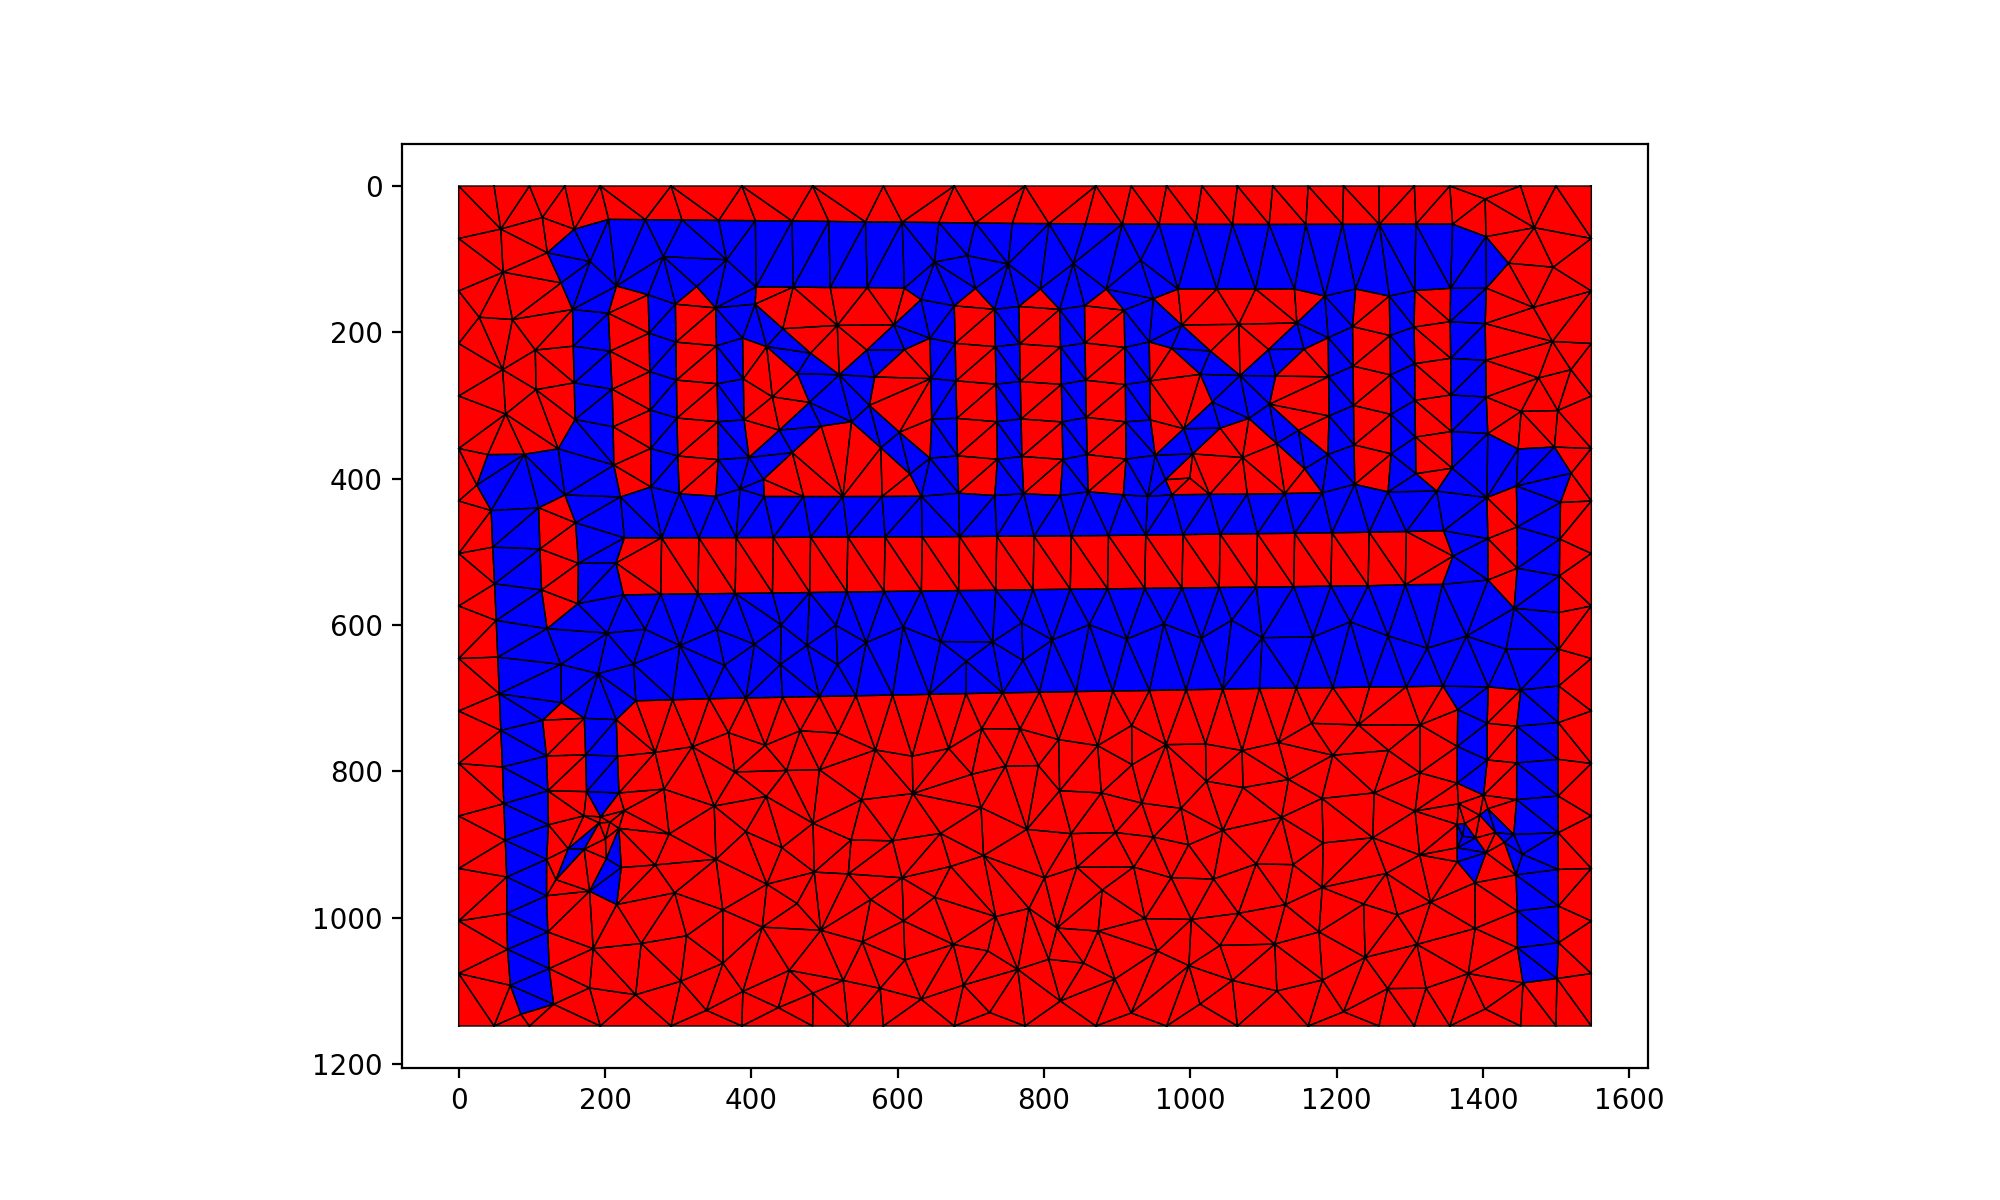

In [8]:
#%% COMPUTE TRIANGLE LABELS FROM CURVES - THE FASTER WAY OF DOING IT
labels = meshing.label_triangles_from_contours(vertices,triangles,edges)

fig, ax = plt.subplots(figsize=figsize)
for t, l in zip(triangles,labels):
    color = l.item(0)*'b'+(not l.item(0))*'r'
    ax.fill(vertices[t,1], vertices[t,0], color)
for t in triangles:
    tri = t[[0,1,2,0]]
    ax.plot(vertices[tri,1], vertices[tri,0], 'k', linewidth=0.5)
ax.invert_yaxis()
ax.set_aspect('equal')
plt.show()

In [9]:
#%% SAVE MESH
filename = 'out/bench_mesh.txt'
meshing.save_mesh(filename,vertices,triangles,labels)